In [107]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv('../../data/telecom_pca.csv')
x = np.array(df.drop(columns=['TARGET']))
y = df['TARGET']

In [109]:
def makeClusters(n):
    km = KMeans(
        n_clusters= n, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    y_km = km.fit_predict(x)
    return km, y_km

In [110]:
def plotClusters(km,y_km, n):
    # plot the clusters
    for i in range(n):
        plt.scatter(
        x[y_km == i, 0], x[y_km == i, 1],
        c = '#' + str(random.randint(100000,999999)),
        label = 'cluster ' + str(i)
    )
    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids'
    )
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

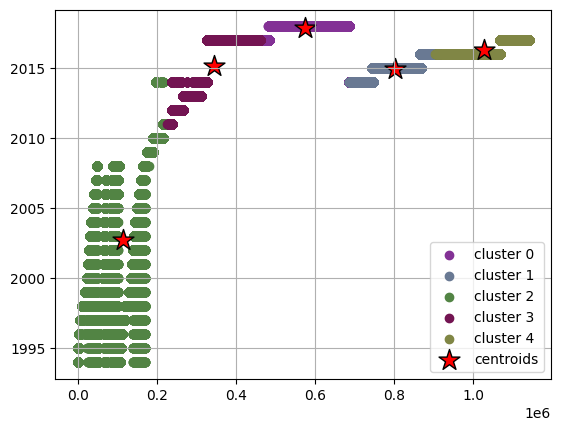

In [111]:
n = 5
km, y_km = makeClusters(n)
plotClusters(km, y_km, n)

In [112]:
clusters = pd.DataFrame(data = {'cluster': y_km})
clusters

,cluster
0,2
1,2
2,2
3,2
4,2
...,...
1140599,4
1140600,4
1140601,4
1140602,4


In [113]:
df_clusters = pd.merge(clusters, df.drop(columns=['TARGET']), left_index=True, right_index=True)
df_clusters

,cluster,Unnamed: 0,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL
0,2,0,1994,2019,931.208938,812.175000,1,5968.700000,2,6,2,945.040000,1004.070,35.850,34.015,72.075,141.840,56.115,11944.079102,0.0
1,2,1,1994,2019,431.082618,486.500000,1,6245.141667,6,4,2,493.815000,159.050,10.595,7.715,11.750,5.110,0.000,9903.157715,0.0
2,2,2,1994,2019,50.619644,52.815000,1,1666.488333,2,3,1,50.300000,0.000,0.000,0.000,0.000,0.000,0.000,0.102539,0.0
3,2,3,1994,2019,399.710034,422.235000,1,2522.008333,3,4,3,406.586667,288.805,158.500,2.670,15.965,0.000,0.000,3600.322266,0.0
4,2,4,1994,2019,612.665844,825.888333,1,1219.961667,0,2,1,751.185000,209.760,186.050,17.515,28.685,3.235,4.475,3852.026367,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140599,4,1140599,2017,2019,297.752650,313.950000,1,2418.486667,5,4,3,303.166667,0.000,0.000,0.000,0.000,0.000,0.000,307945.957031,0.0
1140600,4,1140600,2017,2019,160.663773,178.500000,1,454.116667,0,1,1,170.000000,0.000,0.000,0.000,0.000,0.000,0.000,22647.873535,0.0
1140601,4,1140601,2017,2019,570.147016,642.911667,1,615.866667,1,1,0,609.630000,154.150,64.990,3.660,10.050,0.000,0.000,17582.867188,0.0
1140602,4,1140602,2017,2019,452.736799,525.413333,2,735.645000,1,2,0,414.840000,218.805,102.075,54.065,7.980,5.350,0.065,3015.338867,0.0


In [114]:
# sort the dataframe
df_clusters = df_clusters.sort_values(by=['cluster'])
df_clusters

,cluster,Unnamed: 0,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL
570301,0,570301,2018,2018,100.419387,109.918333,1,194.438333,5,1,0,104.095000,222.755,219.920,7.150,122.315,0.00,0.00,6199.410645,0.0
611700,0,611700,2018,2019,255.055849,251.281667,1,649.801667,3,2,0,250.160000,83.545,47.775,1.150,0.000,0.00,0.00,11718.310547,0.0
611701,0,611701,2018,2019,1378.409374,1623.020000,2,3422.788333,9,3,1,1577.228333,2135.985,155.940,79.600,48.035,109.18,16.85,17147.416992,0.0
611702,0,611702,2018,2018,315.500586,393.333333,1,683.840000,3,2,0,319.000000,0.000,0.000,0.000,0.000,0.00,0.00,77621.821289,0.0
611703,0,611703,2018,2019,280.626610,287.180000,1,728.531667,0,1,1,271.776667,216.530,220.245,26.325,155.540,32.31,36.08,4571.950684,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990299,4,990299,2016,2019,474.239181,432.638333,2,449.515000,1,1,0,431.468333,80.250,86.220,27.050,24.050,128.18,0.00,4092.991211,0.0
990300,4,990300,2016,2019,255.005647,254.020000,1,2027.258333,3,4,1,259.801667,185.290,33.650,48.775,2.750,3.54,0.00,16423.562988,0.0
990301,4,990301,2016,2019,308.047656,262.333333,1,307.333333,0,1,1,307.333333,0.000,0.000,0.000,0.000,0.00,0.00,453566.103516,0.0
990290,4,990290,2016,2019,204.072590,197.326667,1,1795.475000,0,2,0,143.603333,43.550,26.130,13.090,28.150,86.99,8.69,63.537109,0.0


In [115]:
df_to_csv = df_clusters[df_clusters['cluster'] == 0]
df_to_csv
for i in range (n):
    df_to_csv = df_clusters[df_clusters['cluster'] == i]
    df_to_csv.to_csv('../../data/clusters/telecom_pca_cluster'+str(i)+'.csv')